# Reference
**Paper** : 
https://liminyang.web.illinois.edu/data/DLS21_BODMAS.pdf

**Website** : 
https://whyisyoung.github.io/BODMAS/

**Drive** : 
https://drive.google.com/drive/folders/1Uf-LebLWyi9eCv97iBal7kL1NgiGEsv_


### Import required Modules

In [91]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


# Modeling
from sklearn.linear_model import LogisticRegression
# Ensemble Models and CLF-Voting
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.naive_bayes import MultinomialNB, CategoricalNB, GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier



import xgboost as xgb
from xgboost import XGBClassifier


# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Set seed for reproducibility
seed = 44

### Load our Feature-Vectors

In [92]:
bodMas = 'bodmas.npz'
bodMas_df = np.load(bodMas)

bodMas_df

In [93]:
bodMas_df.files

['X', 'y']

In [94]:
# Identify X & y
X = bodMas_df['X']
y = bodMas_df['y']

print(X.shape, y.shape)

(134435, 2381) (134435,)


In [95]:
print(X[10:]) ; print(y[10:])

[[0.12141006 0.00910332 0.00467501 ... 0.         0.         0.        ]
 [0.18317465 0.04973748 0.00886418 ... 0.         0.         0.        ]
 [0.7121212  0.01136364 0.01515152 ... 0.         0.         0.        ]
 ...
 [0.1423067  0.01637877 0.01097404 ... 0.         0.         0.        ]
 [0.14230758 0.01637877 0.01097404 ... 0.         0.         0.        ]
 [0.1423067  0.01637877 0.01097404 ... 0.         0.         0.        ]]
[0 0 0 ... 1 1 1]


In [96]:
np.unique(y)

array([0, 1])

### Prediction here is malicious or benign

#### And based on binary-Y we will build binary-Classifieres first.

### Read Metadata 

In [97]:
bodmas_meta = pd.read_csv('bodmas_metadata.csv', parse_dates= ['timestamp'])

bodmas_meta.head()

,sha,timestamp,family
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,2007-01-01 08:46:39+00:00,NaN
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,2007-01-26 17:16:30+00:00,NaN
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,2007-03-21 02:08:53+00:00,NaN
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,2007-04-25 12:55:06+00:00,NaN
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,2007-11-14 15:03:55+00:00,NaN


In [98]:
# Check unique families and their number
bodmas_meta.family.unique() , bodmas_meta.family.nunique()

(array([nan, 'autoit', 'sakurel', 'gupboot', 'juched', 'hpgandcrab',
        'fuerboos', 'noancooe', 'skeeyah', 'wacatac', 'mira', 'upatre',
        'delfiles', 'ceeinject', 'plugx', 'unruy', 'cambot', 'klez',
        'mocrt', 'nitol', 'vb', 'small', 'simda', 'sillyp2p', 'ditertag',
        'padodor', 'dinwod', 'fakefolder', 'dofoil', 'mydoom', 'urelas',
        'qqpass', 'benjamin', 'gandcrab', 'gepys', 'fearso', 'wanna',
        'dorv', 'qlowzones', 'injector', 'qhosts', 'lolbot', 'wabot',
        'ganelp', 'malex', 'vobfus', 'systex', 'blocker', 'shifu', 'sytro',
        'cuegoe', 'stration', 'occamy', 'trojanx', 'tofsee', 'stormser',
        'ainslot', 'vtflooder', 'sfone', 'picsys', 'koceg', 'duptwux',
        'simbot', 'obfuscator', 'autinject', 'socks', 'pluto',
        'cryptominer', 'plite', 'fuery', 'musecador', 'fareit', 'berbew',
        'drolnux', 'lunam', 'floxif', 'zbot', 'netwire', 'grandcrab',
        'ursnif', 'msposer', 'autorun', 'soltern', 'mofksys', 'carberp',
   

In [99]:
# Check number of samples of most common family 
x = bodmas_meta.family.value_counts().to_frame().head(10)
print(x)

          family
sfone       4729
wacatac     4694
upatre      3901
wabot       3673
small       3339
ganelp      2232
dinwod      2057
mira        1960
berbew      1749
sillyp2p    1616


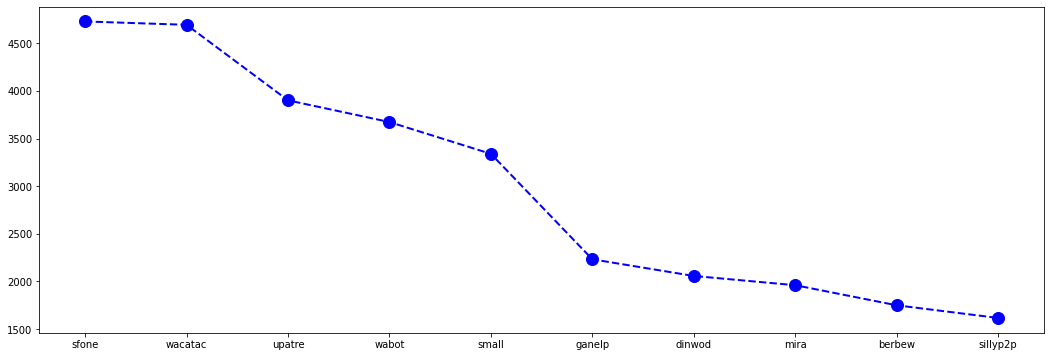

In [100]:
# Visualize most common family (10)
plt.figure(figsize = (18,6))
plt.plot(x, color='blue', marker='o', linestyle='dashed',
     linewidth=2, markersize=12)
plt.savefig('Most_Common_Family.png')
plt.show()

In [101]:
# Convert timestamp to date
bodmas_meta['timestamp'] = pd.to_datetime(bodmas_meta['timestamp'], format = '%Y-%m-%d %H:%M:%S', utc=True).astype(np.int64)
bodmas_meta.head()

,sha,timestamp,family
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,1167641199000000000,NaN
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,1169831790000000000,NaN
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,1174442933000000000,NaN
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,1177505706000000000,NaN
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,1195052635000000000,NaN


In [12]:
bodmas_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134435 entries, 0 to 134434
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sha        134435 non-null  object
 1   timestamp  134435 non-null  int64 
 2   family     57293 non-null   object
dtypes: int64(1), object(2)
memory usage: 3.1+ MB


In [13]:
bodmas_meta.isnull().sum()

sha              0
timestamp        0
family       77142
dtype: int64

In [14]:
# Replace NAN to benign to clarify as benign
bodmas_meta.fillna('benign', inplace= True)
bodmas_meta.head()

,sha,timestamp,family
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,1167641199000000000,benign
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,1169831790000000000,benign
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,1174442933000000000,benign
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,1177505706000000000,benign
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,1195052635000000000,benign


In [15]:
# Check (1) in Y here == malware in metadata
print(bodmas_meta[-61:])
print(y[-61:])

                                                      sha  \
134374  d1225074aeb0fd8e565af4981c8c55784452c5fbcd2cbe...   
134375  db2ac399e68bec4a9cc6cb2b7b4b7cc3217770c25a1109...   
134376  2d2873cf2d4ffa26a784ee0ddb9516f31212f8f0f78495...   
134377  ed433bc20720ad788f4f253f9071eaaae3199c0136788c...   
134378  3ce93329dd561ddcd122bcfc4369c19ffbd1433ce4927e...   
...                                                   ...   
134430  1515deebbf3c55e46c1a4168db8cc0c149810e855a5497...   
134431  502e1af8f263d74b568f6e08dfb4eb2d4228cdef22109a...   
134432  6265ccd5222ed1159000ddcd2b70376a2ed5e3e56795dd...   
134433  2d4d2b77020d17418b6de26e5d728ad3a3cc6a6a44ccab...   
134434  8ad8b39bcb7fb6b1edb6734c90173dff70850046bae5d3...   

                  timestamp     family  
134374  1601424000000000000     benign  
134375  1601433977000000000    wacatac  
134376  1601433980000000000    wacatac  
134377  1601433995000000000    wacatac  
134378  1601434012000000000  elenoocka  
...                  

**Okay matched**

### Merge 
Merge tiemstamp with appropriate category by sha column.

In [16]:
# Read category data
bodmas_cate = pd.read_csv('bodmas_malware_category.csv')

In [17]:
bodmas_cate.head()

,sha256,category
0,6a695877f571d043fe08d3cc715d9d4b4af85ffe837fa0...,worm
1,9ef9439795cac85e711b59df296a19e7ac43c144035f2f...,trojan
2,32de655f9010d8d152db16c6e5bbad215fa09286a08ff1...,worm
3,a68f7fb26ad84859625002395cf67f22ea0956996ed9c8...,downloader
4,d5c74472adfda20166a65f8b2886819a014ebcb67b999e...,trojan


In [18]:
bodmas_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57293 entries, 0 to 57292
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sha256    57293 non-null  object
 1   category  57293 non-null  object
dtypes: object(2)
memory usage: 895.3+ KB


We can see we have 57293 samples knows category and other should be the benign samples

In [102]:
# # rename sha256 to sha to match with metadata
bodmas_cate.rename(columns= {'sha256' : 'sha'}, inplace= True)

In [103]:
bodmas_cate.head()

,sha,category
0,6a695877f571d043fe08d3cc715d9d4b4af85ffe837fa0...,worm
1,9ef9439795cac85e711b59df296a19e7ac43c144035f2f...,trojan
2,32de655f9010d8d152db16c6e5bbad215fa09286a08ff1...,worm
3,a68f7fb26ad84859625002395cf67f22ea0956996ed9c8...,downloader
4,d5c74472adfda20166a65f8b2886819a014ebcb67b999e...,trojan


In [104]:
bodmas_cate.category.unique()

array(['worm', 'trojan', 'downloader', 'dropper', 'backdoor',
       'ransomware', 'informationstealer', 'rootkit', 'p2p-worm',
       'cryptominer', 'trojan-gamethief', 'pua', 'virus', 'exploit'],
      dtype=object)

In [105]:
# Combine timestamp from meta with category from bodmas_cate based on sha column
date_cate = pd.merge(bodmas_meta, bodmas_cate, on= 'sha', how= 'left')
date_cate.head()

,sha,timestamp,family,category
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,1167641199000000000,NaN,NaN
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,1169831790000000000,NaN,NaN
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,1174442933000000000,NaN,NaN
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,1177505706000000000,NaN,NaN
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,1195052635000000000,NaN,NaN


In [106]:
date_cate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134435 entries, 0 to 134434
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sha        134435 non-null  object
 1   timestamp  134435 non-null  int64 
 2   family     57293 non-null   object
 3   category   57293 non-null   object
dtypes: int64(1), object(3)
memory usage: 5.1+ MB


In [107]:
# Replace NAN to benign 
date_cate.fillna('benign', inplace= True)
date_cate.head()

,sha,timestamp,family,category
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,1167641199000000000,benign,benign
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,1169831790000000000,benign,benign
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,1174442933000000000,benign,benign
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,1177505706000000000,benign,benign
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,1195052635000000000,benign,benign


### Label Encoding

In [108]:
# Transform Family into numeric/labels format
le = LabelEncoder()
date_cate['family'] = le.fit_transform(date_cate['family'])
date_cate['category'] = le.fit_transform(date_cate['category'])
date_cate.head()

,sha,timestamp,family,category
0,e6d7b4bab32def853ab564410df53fa33172dda1bfd48c...,1167641199000000000,54,1
1,5af37a058a5bcf2284c183ee98d92b7c66d8f5ce623e92...,1169831790000000000,54,1
2,5bfbbea150af5cef2d3a93b80ef7c7faea9f564b56045d...,1174442933000000000,54,1
3,216f592f1e1717d5681b7f5f2b14a28a2f0c603b5b7318...,1177505706000000000,54,1
4,a1ca76813d2e9e7e23b830c87fbe29bcb51fcbe096e445...,1195052635000000000,54,1


In [109]:
date_cate.category.unique(), '--------', date_cate.family.unique()

(array([ 1, 11, 14,  0,  3,  6,  4,  9, 10,  2,  8,  5, 13,  7, 12]),
 '--------',
 array([ 54,  33, 438, 234, 260, 241, 201, 347, 464, 552, 320, 520, 138,
         94, 380, 517,  87, 271, 324, 344, 528, 465, 457, 453, 145, 360,
        143, 181, 147, 331, 522, 407,  55, 209, 221, 186, 555, 150, 406,
        250, 405, 295, 550, 211, 307, 546, 490,  71, 449, 492, 124, 484,
        355, 510, 501, 483,  15, 548, 444, 374, 273, 158, 456, 353,  31,
        469, 381, 120, 379, 202, 330, 182,  56, 155, 299, 195, 578, 343,
        231, 523, 328,  37, 473, 325,  89, 285, 463, 518, 536, 574, 185,
         76, 106, 357,  68, 399, 393,  34, 362, 432,   6, 447, 131, 162,
          3,  48, 408, 402, 225, 238, 439, 340,  66,   1, 427, 576, 206,
        270, 496,  96, 272, 137,  18, 434, 466, 140, 251, 544, 495, 118,
        174, 545,  50, 214, 337, 529, 428,  98, 491, 383, 262, 192, 571,
        443, 579, 159, 244, 422,  22, 412, 253, 538, 100, 168, 254, 512,
        178, 531, 335, 179,  82, 242, 210

In [110]:
# drop sha column
date_cate.drop('sha', axis= 1, inplace= True)

In [111]:
date_cate= pd.DataFrame(date_cate)

In [112]:
# Convert ndarray to dataframe
X = pd.DataFrame(X)
X.head()

y= pd.DataFrame(y)

### Concate
Combine y and timestamp and family with X

In [113]:
new_X = pd.concat([X, date_cate[['timestamp', 'family']], y], axis=1, ignore_index=True, sort=False)

new_X.tail()

,0,1,2,3,4,5,6,7,8,9,...,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383
134430,0.065420,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005619,0.004121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1601435122000000000,33,1
134431,0.065421,0.005993,0.005216,0.005492,0.005747,0.004183,0.005373,0.004388,0.005617,0.004121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1601435123000000000,33,1
134432,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1601435124000000000,33,1
134433,0.142308,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002386,...,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1601435126000000000,33,1
134434,0.142307,0.016379,0.010974,0.005991,0.009369,0.005670,0.003335,0.003099,0.009761,0.002385,...,0.0,2180.0,585728.0,0.0,0.0,0.0,0.0,1601435127000000000,33,1


In [114]:
# Identify y with category
y = date_cate['category'].values

In [115]:
len(X), len(date_cate), len(new_X), len(y)

(134435, 134435, 134435, 134435)

In [116]:
# Check Nulls
new_X.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
2379    0
2380    0
2381    0
2382    0
2383    0
Length: 2384, dtype: int64

### Split dataset to : 
X_train, y_train, X_test, y_test

In [117]:
from sklearn.model_selection import train_test_split

# Create the training and test sets with meta and without meta
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= seed)

X_train_, X_test_, y_train_, y_test_ = train_test_split(new_X, y, test_size= 0.2, stratify= y, random_state= seed)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(X_train_.shape, y_train_.shape)
print(X_test_.shape, y_test_.shape)

(107548, 2381) (107548,)
(26887, 2381) (26887,)
(107548, 2384) (107548,)
(26887, 2384) (26887,)


#### Scaling

In [127]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_ = scaler.fit_transform(X_train_)
X_test_ = scaler.transform(X_test_)

### Modeling

In [118]:
# Function to simplify measuring.
def summarize_clf(y_test, pred):

    acc = accuracy_score(y_test, pred, normalize=True)
    num_acc = accuracy_score(y_test, pred, normalize=False)
    prec = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    
    print("Length of testing data: ", len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("precision_score : " , prec)
    print("recall_score : ", recall)

### Train Base-Model

In [128]:
# Set the base model..
logReg = LogisticRegression(random_state = seed)

# Fit the training dataset
logReg.fit(X_train, y_train)

LogisticRegression(random_state=44)

In [129]:
# Create the predicted tags: pred
pred = logReg.predict(X_test)

In [130]:
summarize_clf(y_test, pred)

Length of testing data:  26887
accuracy_count :  24043
accuracy_score :  0.8942239744114256
precision_score :  0.8807215885422314
recall_score :  0.8942239744114256


##### Evaluate Logistic Regression Without Metadata

In [131]:
# Mean accuracy in train
print('Mean accuracy in Train dataset :', logReg.score(X_train, y_train))
# Mean accuracy in test
print('Mean accuracy in Test dataset :', logReg.score(X_test, y_test))

Mean accuracy in Train dataset : 0.8954792278796444
Mean accuracy in Test dataset : 0.8942239744114256


In [132]:
# Set the base model with Meta..
logReg_ = LogisticRegression(random_state = seed)

# Fit the training dataset
logReg_.fit(X_train_, y_train_)

LogisticRegression(random_state=44)

In [133]:
# Create the predicted tags: pred
pred_ = logReg_.predict(X_test_)

##### Evaluate Logistic Regression With Metadata

In [134]:
# Mean accuracy in train
print('Mean accuracy in Train dataset :', logReg_.score(X_train_, y_train_))
# Mean accuracy in test
print('Mean accuracy in Test dataset :', logReg_.score(X_test_, y_test_))

Mean accuracy in Train dataset : 0.9441923606203741
Mean accuracy in Test dataset : 0.9430951761074126


In [135]:
summarize_clf(y_test, pred_)

Length of testing data:  26887
accuracy_count :  25357
accuracy_score :  0.9430951761074126
precision_score :  0.9332549102297332
recall_score :  0.9430951761074126


##### Finish Base Model..

We can see logistic Regression not benefit from Metadata(timestamp and labels of family)

### MultinomialNB

In [44]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

In [59]:
# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(X_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, pred)
print(score)

0.6413136459999256


In [60]:
summarize_clf(y_test, pred)

Length of testing data:  26887
accuracy_count :  17243
accuracy_score :  0.6413136459999256
precision_score :  0.7339882516838523
recall_score :  0.6413136459999256


In [71]:
# Hyperparamete Tuning (Alpha)

# Create the list of alphas: alphas
alphas = np.arange(0,2, .1)

# Define train_and_predict()
def train_and_predict(alpha, X_train, X_test):
    # Instantiate the classifier
    model = MultinomialNB(alpha= alpha)
    # Fit to the training data
    model.fit(X_train, y_train)
    # Predict the labels: pred
    pred = model.predict(X_test)
    # Compute accuracy: score
    score = accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha, X_train, X_test))
    print()

Alpha:  0.0
Score:  0.6144233272585264

Alpha:  0.1
Score:  0.6336519507568713

Alpha:  0.2
Score:  0.6359578978688586

Alpha:  0.30000000000000004
Score:  0.6362554394316956

Alpha:  0.4
Score:  0.6371108714248521

Alpha:  0.5
Score:  0.6377431472458809

Alpha:  0.6000000000000001
Score:  0.6388217354111653

Alpha:  0.7000000000000001
Score:  0.6392308550600662

Alpha:  0.8
Score:  0.6395283966229033

Alpha:  0.9
Score:  0.6410532971324432

Alpha:  1.0
Score:  0.6413136459999256

Alpha:  1.1
Score:  0.6418715364302451

Alpha:  1.2000000000000002
Score:  0.6424294268605646

Alpha:  1.3
Score:  0.6427641611187562

Alpha:  1.4000000000000001
Score:  0.643396436939785

Alpha:  1.5
Score:  0.6442518689329416

Alpha:  1.6
Score:  0.646223081786737

Alpha:  1.7000000000000002
Score:  0.6471900918659576

Alpha:  1.8
Score:  0.6487521850708521

Alpha:  1.9000000000000001
Score:  0.6496820024547179



### With Metadata

In [74]:
# Fit the classifier to the training data
nb_classifier.fit(X_train_, y_train_)

# Create the predicted tags: pred
pred = nb_classifier.predict(X_test_)

# Calculate the accuracy score: score
score = accuracy_score(y_test_, pred)
print(score)

0.7136162457693309


In [75]:
summarize_clf(y_test_, pred)

Length of testing data:  26887
accuracy_count :  19187
accuracy_score :  0.7136162457693309
precision_score :  0.8286587345306854
recall_score :  0.7136162457693309


In [76]:
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha, X_train_, X_test_))
    print()

Alpha:  0.0
Score:  0.6859448804254844

Alpha:  0.1
Score:  0.7050991185331201

Alpha:  0.2
Score:  0.7073678729497527

Alpha:  0.30000000000000004
Score:  0.7080373414661361

Alpha:  0.4
Score:  0.7083348830289731

Alpha:  0.5
Score:  0.7091531223267751

Alpha:  0.6000000000000001
Score:  0.709562241975676

Alpha:  0.7000000000000001
Score:  0.7101201324059955

Alpha:  0.8
Score:  0.7103060958827686

Alpha:  0.9
Score:  0.7118309963923085

Alpha:  1.0
Score:  0.7136162457693309

Alpha:  1.1
Score:  0.7143229069810689

Alpha:  1.2000000000000002
Score:  0.7156990367091903

Alpha:  1.3
Score:  0.7167032394837654

Alpha:  1.4000000000000001
Score:  0.7176330568676312

Alpha:  1.5
Score:  0.7180049838211775

Alpha:  1.6
Score:  0.7186372596422063

Alpha:  1.7000000000000002
Score:  0.7194554989400082

Alpha:  1.8
Score:  0.7211291702309667

Alpha:  1.9000000000000001
Score:  0.7228772269126343



### OneVsRest Multinomial Classifier

In [77]:
# Instantiate the model. 
ovr_nb_clf = OneVsRestClassifier(MultinomialNB())

In [81]:
# Without Metadata
ovr_nb_clf.fit(X_train, y_train)

# Create the predicted tags: pred
pred = ovr_nb_clf.predict(X_test)

# Calculate the accuracy score: score
score = accuracy_score(y_test, pred)
print(score)

# Display the summary of Classifier
summarize_clf(y_test, pred)

0.6750102279912226
Length of testing data:  26887
accuracy_count :  18149
accuracy_score :  0.6750102279912226
precision_score :  0.7277631719514693
recall_score :  0.6750102279912226


In [83]:
# Define train_and_predict()
def train_and_predict(alpha, X_train, X_test):
    # Instantiate the classifier
    model = OneVsRestClassifier(MultinomialNB(alpha= alpha))
    # Fit to the training data
    model.fit(X_train, y_train)
    # Predict the labels: pred
    pred = model.predict(X_test)
    # Compute accuracy: score
    score = accuracy_score(y_test, pred)
    return score

# Without Metadata
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha, X_train, X_test))
    print()

Alpha:  0.0
Score:  0.658161936995574

Alpha:  0.1
Score:  0.6716628854093056

Alpha:  0.2
Score:  0.671923234276788

Alpha:  0.30000000000000004
Score:  0.6725183174024622

Alpha:  0.4
Score:  0.6728902443560085

Alpha:  0.5
Score:  0.6735597128723919

Alpha:  0.6000000000000001
Score:  0.6741547959980659

Alpha:  0.7000000000000001
Score:  0.6744895302562577

Alpha:  0.8
Score:  0.6743407594748392

Alpha:  0.9
Score:  0.6744523375609031

Alpha:  1.0
Score:  0.6750102279912226

Alpha:  1.1
Score:  0.6749730352958679

Alpha:  1.2000000000000002
Score:  0.6748986499051586

Alpha:  1.3
Score:  0.674861457209804

Alpha:  1.4000000000000001
Score:  0.6759400453750883

Alpha:  1.5
Score:  0.6766095138914717

Alpha:  1.6
Score:  0.6769442481496634

Alpha:  1.7000000000000002
Score:  0.6772789824078551

Alpha:  1.8
Score:  0.6776509093614014

Alpha:  1.9000000000000001
Score:  0.6776137166660468



In [84]:
# With Metadata
ovr_nb_clf.fit(X_train_, y_train_)

# Create the predicted tags: pred
pred = ovr_nb_clf.predict(X_test_)

# Calculate the accuracy score: score
score = accuracy_score(y_test_, pred)
print(score)

# Display the summary of Classifier
summarize_clf(y_test_, pred)

0.7582474801948897
Length of testing data:  26887
accuracy_count :  20387
accuracy_score :  0.7582474801948897
precision_score :  0.8286959969736484
recall_score :  0.7582474801948897


In [85]:
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha, X_train_, X_test_))
    print()

Alpha:  0.0
Score:  0.7536355859709153

Alpha:  0.1
Score:  0.7550861010897459

Alpha:  0.2
Score:  0.7549745230036821

Alpha:  0.30000000000000004
Score:  0.7551604864804552

Alpha:  0.4
Score:  0.7559787257782572

Alpha:  0.5
Score:  0.7566853869899952

Alpha:  0.6000000000000001
Score:  0.7570573139435415

Alpha:  0.7000000000000001
Score:  0.75720608472496

Alpha:  0.8
Score:  0.7570573139435415

Alpha:  0.9
Score:  0.7576895897645702

Alpha:  1.0
Score:  0.7582474801948897

Alpha:  1.1
Score:  0.7586565998437906

Alpha:  1.2000000000000002
Score:  0.760441849220813

Alpha:  1.3
Score:  0.7606650053929408

Alpha:  1.4000000000000001
Score:  0.7617807862535798

Alpha:  1.5
Score:  0.7618923643396437

Alpha:  1.6
Score:  0.7622270985978354

Alpha:  1.7000000000000002
Score:  0.7619667497303529

Alpha:  1.8
Score:  0.7624502547699632

Alpha:  1.9000000000000001
Score:  0.7636404210213115



### Voting Classifiers (MultiClass) >:

In [86]:
# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=seed)

# Define the list classifiers
classifiers = [('Logistic Regression', logReg), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [87]:
# Without Metadata
# Iterate over the pre-defined list of classifiers 
for clf_name, clf in classifiers:    

    # Fit clf to the training set
    clf.fit(X_train, y_train)    

    # Predict y_pred
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 

    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.896
K Nearest Neighbours : 0.949
Classification Tree : 0.692


In [88]:
# With Metadata + y (binary-label)
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    

    # Fit clf to the training set
    clf.fit(X_train_, y_train_)    

    # Predict y_pred
    y_pred = clf.predict(X_test_)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_, y_pred) 

    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.943
K Nearest Neighbours : 0.968
Classification Tree : 0.861


#### FANTASTIC !

In [89]:
# Without Metadata
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)

# Calculate accuracy score
Accuracy(vc, X_test, y_test)

Accuracy score for Model : 0.92


In [90]:
# With Metadata
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train_, y_train_)

# Calculate accuracy score
Accuracy(vc, X_test_, y_test_)

Accuracy score for Model : 0.95


#### AMAZING ..!

##### We can see most Classifiers benefit from Metadata like(VotingClassifier, K Nearest Neighbours, Classification Tree)
##### NN Models...